##**1 - Entendimento do negócio**
A análise a seguir traz insights sobre como as vendas de uma empresa especializada em vendas de chocolate estão acontecendo, tendo em vista a necessidade de entender padrões de vendas, funcionários mais capacitados, produtos com maior demanda e regiões que estão de destacando

Analisar e entender dados de vendas podem trazer insights importantes sobre quais decisões e ações tomar, baseado em um fato.

A EDA a seguir tem como objetivo aprimorar os meus conhecimentos.


##**2 - Entendimento dos dados**
Para realizar essa análise irei usar uma base de vendas de chocolates do kaggle: https://www.kaggle.com/datasets/atharvasoundankar/chocolate-sales

Columns & Description:
- Sales Person : Name of the salesperson responsible for the transaction
- Country : Sales region or store location where the transaction took place
- Product: Name of the chocolate product sold.
- Date: The transaction date of the chocolate sale.
- Amount: Total revenue generated from the sale.
- Box Shipped: Number of chocolate boxes shipped in the order.

##**3 - Importações e Pré-Processamentos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata


def pod_academy_box_plot(dataframe):
    """
    Plota boxplots estilizados com título simplificado para todas as variáveis numéricas do dataframe fornecido
    em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os boxplots serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        # Check if axes is a single AxesSubplot object or an array
        if nrows == 1 and len(numeric_columns) <= 3:  # Single row, 1-3 plots
            ax = axes[i % 3] if len(numeric_columns) > 1 else axes # Handle single plot case
        else: # Multi-row or more than 3 plots in single row
            ax = axes[i // 3, i % 3]

        sns.boxplot(data=dataframe[column], ax=ax, color="skyblue")
        ax.set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        ax.set_ylabel('')
        ax.tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i + 1, nrows * 3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

def pod_academy_histograms(dataframe, kde=False):
    """
    Plota histogramas corrigidos com a curva KDE (Kernel Density Estimation) para todas as variáveis numéricas
    do dataframe fornecido em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os histogramas serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota histogramas com KDE para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        # Check if axes is a single AxesSubplot object or an array
        if nrows == 1 and len(numeric_columns) <= 3:  # Single row, 1-3 plots
            ax = axes[i % 3] if len(numeric_columns) > 1 else axes  # Handle single plot case
        else:  # Multi-row or more than 3 plots in single row
            ax = axes[i // 3, i % 3]

        sns.histplot(data=dataframe[column], ax=ax, color="skyblue", bins=30, kde=kde)
        ax.set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        ax.set_ylabel('Frequência')
        ax.tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i + 1, nrows * 3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Histograma com KDE", fontsize=20, fontweight='bold', y=1.05)

def plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2):
    """
    Plota a frequência de categorias para variáveis categóricas em um DataFrame.

    Parâmetros:
    - df: DataFrame para plotagem.
    - corte_cardinalidade: Cardinalidade máxima para uma coluna ser considerada (padrão é 30).
    - graficos_por_linha: Quantidade de gráficos por linha (padrão é 3).

    Retorna:
    - Exibe os gráficos de barras.
    """

    # Gera metadados para o DataFrame
    metadados = []
    for coluna in df.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Filtra colunas com cardinalidade maior que o corte e tipos não numéricos
    variaveis_categoricas = df_metadados[(df_metadados['Cardinalidade'] <= corte_cardinalidade) & (df_metadados['Tipo'] == 'object')]

    # Calcula o número de linhas e colunas para os subplots
    n_linhas = -(-len(variaveis_categoricas) // graficos_por_linha)  # Ceiling division
    n_colunas = min(len(variaveis_categoricas), graficos_por_linha)

    # Plota as variáveis categóricas
    fig, axs = plt.subplots(nrows=n_linhas, ncols=n_colunas, figsize=(15, 5 * n_linhas))

    for i, (idx, linha) in enumerate(variaveis_categoricas.iterrows()):
        var = linha['Variável']
        ax = axs[i // graficos_por_linha, i % graficos_por_linha]
        df[var].value_counts().sort_index().plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(f'Frequência em {var}')
        ax.set_ylabel('Frequência')
        ax.set_xlabel(var)

    # Remove os eixos vazios, se houver
    for j in range(i + 1, n_linhas * n_colunas):
        axs[j // graficos_por_linha, j % graficos_por_linha].axis('off')

    plt.tight_layout()
    plt.show()

pd.set_option('display.max_rows', None)  # Define o número máximo de linhas a serem exibidas
pd.set_option('display.max_columns', None)


In [ ]:
df = pd.read_csv('Chocolate Sales.csv', sep=',')

In [ ]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [ ]:
df.tail()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384
1093,Karlen McCaffrey,India,70% Dark Bites,23-May-22,"$5,075",344


In [ ]:
df.shape

(1094, 6)

In [ ]:
metadata = generate_metadata(df)
metadata

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,Boxes Shipped,int64,0,0.0,385
1,Sales Person,object,0,0.0,25
2,Country,object,0,0.0,6
3,Product,object,0,0.0,22
4,Date,object,0,0.0,168
5,Amount,object,0,0.0,827


In [ ]:
#Amount
df['Amount'].value_counts()

,count
Amount,
"$2,317",5
"$2,303",4
"$4,361",4
"$3,472",4
"$3,577",4
"$7,714",4
"$5,691",4
"$6,454",4
"$3,374",3


In [ ]:
#Amount
df['Amount'] = df['Amount'].str.replace('$', '').str.replace(',', '').str.replace('.',',').astype(float)

In [ ]:
#Date
df['Date'].value_counts()

,count
Date,
30-Jun-22,16
13-Jan-22,16
02-Mar-22,16
07-Jul-22,15
04-Jul-22,14
15-Jun-22,14
05-Jul-22,13
16-Feb-22,13
11-Jul-22,13


In [ ]:
df['Month'] = df['Date'].str.split('-').str[1]
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320.0,180,Jan
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896.0,94,Aug
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501.0,91,Jul
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726.0,342,Apr
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685.0,184,Feb


In [ ]:
df['Product'].value_counts()

,count
Product,
Eclairs,60
50% Dark Bites,60
Smooth Sliky Salty,59
White Choc,58
Drinking Coco,56
Spicy Special Slims,54
Organic Choco Syrup,52
85% Dark Bars,50
Fruit & Nut Bars,50


In [ ]:
df['Country'].value_counts()

,count
Country,
Australia,205
India,184
USA,179
UK,178
Canada,175
New Zealand,173


In [ ]:
#Gerando mais uma coluna
df['Amount per box'] = round(df['Amount'] / df['Boxes Shipped'],2).astype(float)
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month,Amount per box
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320.0,180,Jan,29.56
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896.0,94,Aug,84.00
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501.0,91,Jul,49.46
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726.0,342,Apr,37.21
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685.0,184,Feb,74.38


In [ ]:
metadata = generate_metadata(df)
metadata

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,Boxes Shipped,int64,0,0.0,385
1,Amount,float64,0,0.0,827
2,Amount per box,float64,0,0.0,1036
3,Sales Person,object,0,0.0,25
4,Country,object,0,0.0,6
5,Product,object,0,0.0,22
6,Date,object,0,0.0,168
7,Month,object,0,0.0,8


##**4 - Análise Exploratória de Dados (EDA)**

###**4.1 - Análise Univariada**

####**4.1.1 - Variáveis Numéricas**

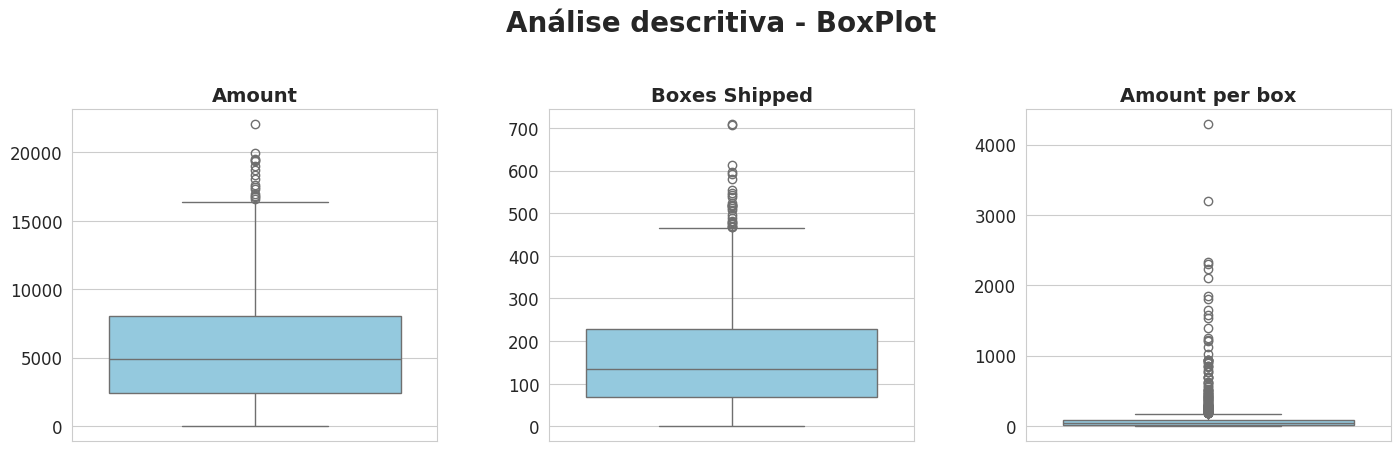

In [ ]:
pod_academy_box_plot(df)

- Amount: Não possuímos outliers no limite inferior, a distribuição não está discrepante e podemos visualizar a existência de outliers no limite superior, indicando uma grande compra que pode ter sido feita por grandes players
- Boxes shipped: Similar ao Amount, temos apenas outliers no limite superior, o que pode indicar a venda para grandes players
- Amount per box: O preço por caixa está com pouca dispersão, com valores concentrados em preços mais baixos, os outilers no limite superior indicam produtos com um grande preço agregado

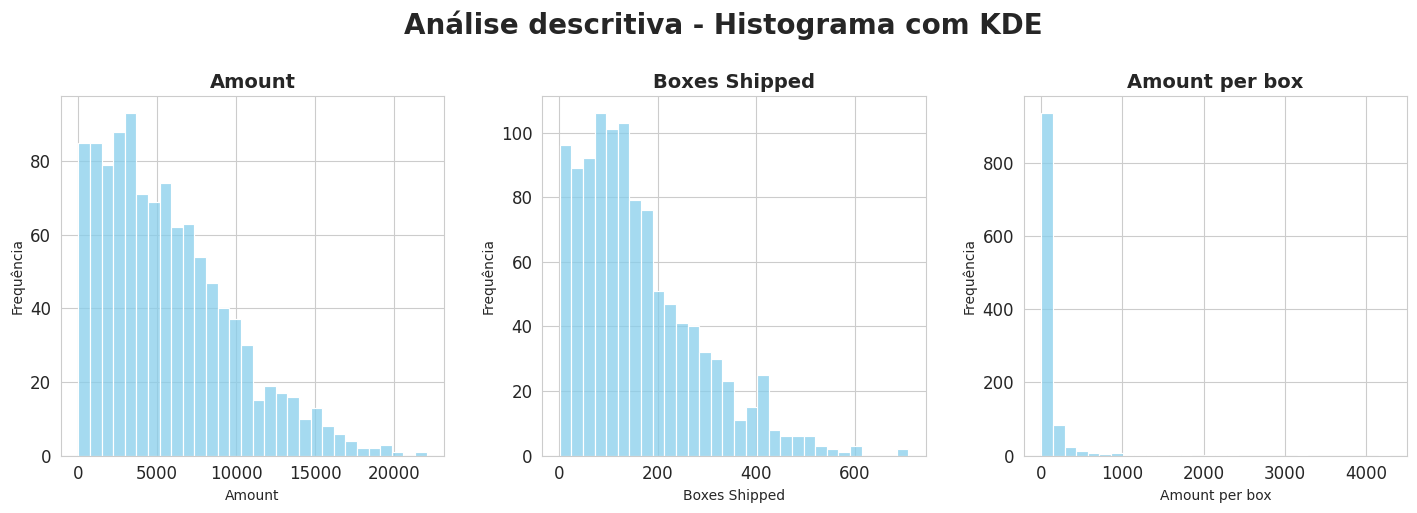

In [ ]:
pod_academy_histograms(df)

- Amount: Observando a distribuição podemos notar que temos uma concentração maior de vendas de produtos com preços mais baixos, o que pode nos gerar insights sobre qual o perfil dos consumidores, preferindo fazer compras mais baratas. Os maiores valores podem indicar big players. Como sugestão podemos focar os estoques e marketing nesses produtos mais baratos, podendo até realizar promoções
- Boxes Shipped: Podemos perceber que a quantidade de caixas por compra é consideravelmente alta, podemos pensar em pacotes de vendas com preços mais interessantes e/ou estratégias de marketing aumentar a quantidade de caixa por venda
- Amount per box: Temos uma grande concentração do preoç por caixa abaixo dos 1000, indicando que podemos pensar em estratégias para aumentar esse valor

- O histograma de "Amount" (Valor total das vendas) mostra uma distribuição assimétrica à direita, indicando que a maioria das vendas ocorre em faixas menores de faturamento, mas há outliers com valores altos.
Ação: Estratégias para incentivar compras maiores, como descontos progressivos ou pacotes promocionais, podem ajudar a aumentar o ticket médio.
- O gráfico de "Amount per box" mostra que a maioria das caixas vendidas tem um valor unitário baixo, o que sugere que os preços podem estar comprimidos.
Ação: Explorar a possibilidade de lançar produtos premium ou pacotes de edição limitada para aumentar o valor médio por caixa.

- O histograma de "Boxes Shipped" mostra que a maioria dos pedidos envolve um número relativamente baixo de caixas, mas há um longo cauda de pedidos grandes.
Ação: Avaliar os custos logísticos e ver se pedidos pequenos estão gerando ineficiências no transporte. Programas de "Pedido Mínimo para Frete Grátis" podem ajudar a reduzir a frequência de envios pequenos e aumentar a eficiência operacional.
- A variação de "Amount per box" sugere que pode haver oportunidades de otimização na precificação ou embalagem.
Ação: Verificar se o custo de embalagem e distribuição está alinhado com a margem de lucro dos diferentes produtos.

- Caso a empresa tenha clientes corporativos ou revendedores, os pedidos muito pequenos podem indicar dificuldades na gestão de estoque por parte dos clientes.
Ação: Oferecer soluções como assinaturas de chocolates para garantir um fluxo previsível de pedidos e reduzir a necessidade de pequenos reabastecimentos.
- Se os produtos forem voltados para consumidores finais, o preço baixo por caixa pode indicar que clientes compram chocolates esporadicamente e em pequenas quantidades.
Ação: Criar programas de fidelidade para incentivar compras frequentes e aumentar o engajamento do consumidor.

In [ ]:
df.describe()

,Amount,Boxes Shipped,Amount per box
count,1094.000000,1094.000000,1094.000000
mean,5652.308044,161.797989,105.720073
std,4102.442014,121.544145,278.658461
min,7.000000,1.000000,0.010000
25%,2390.500000,70.000000,14.590000
50%,4868.500000,135.000000,36.145000
75%,8027.250000,228.750000,79.157500
max,22050.000000,709.000000,4291.000000


- 1. Oportunidades para Aumento de Receita
-- O ticket médio por pedido é 5.652,31, mas há uma alta variação (desvio padrão: 4.102,44) e pedidos chegando a 22.050,00.
-- Ação: Criar estratégias para aumentar o ticket médio, como pacotes de produtos premium, descontos progressivos ou brindes para compras acima de um certo valor.
-- A mediana do "Amount per box" é 36,15, mas a média está em 105,72, o que sugere que poucos pedidos de alto valor distorcem a média. Além disso, o percentil 75% é 79,16, mostrando que 75% dos pedidos têm um valor por caixa inferior a esse.
-- Ação: Trabalhar na precificação, possivelmente segmentando produtos para diferentes públicos e destacando itens de maior valor agregado.

- 2. Redução de Custos
-- A mediana de caixas enviadas por pedido é 135, mas há pedidos pequenos (mínimo de 1 caixa) e muito grandes (máximo de 709 caixas).
-- Ação: Avaliar se pedidos pequenos estão gerando custos logísticos desproporcionais. Criar incentivos para compras em maior volume pode ajudar a reduzir o número de pedidos pequenos e otimizar a logística.
-- O Amount per box tem uma variação extremamente alta (desvio padrão de 278,66, com pedidos indo de 0,01 até 4.291,00).
-- Ação: Pode ser interessante analisar se certos clientes ou canais de venda têm um valor muito abaixo da média, indicando necessidade de ajustes na política de precificação.

- 3. Melhorias na Qualidade de Vida
-- Se houver um número significativo de pedidos pequenos, pode indicar que os clientes têm dificuldades na gestão de estoque ou fluxo de caixa.
-- Ação: Criar um programa de assinatura ou recompra automática pode facilitar a vida dos clientes e garantir um fluxo de pedidos mais previsível.
-- A grande dispersão no Amount per box sugere que pode haver diferenças significativas nos tamanhos das embalagens ou produtos vendidos.
-- Ação: Analisar se os produtos mais baratos são acessíveis para clientes de baixa renda e se há formas de melhorar a acessibilidade a chocolates premium.

####**4.1.2 - Variáveis Categóricas**

In [ ]:
df.describe(include = 'object')

,Sales Person,Country,Product,Date,Month
count,1094,1094,1094,1094,1094
unique,25,6,22,168,8
top,Kelci Walkden,Australia,Eclairs,30-Jun-22,Jun
freq,54,205,60,16,163


- 1. Oportunidades para Aumento de Receita
-- O vendedor com mais pedidos é Kelci Walkden, com 54 vendas. Isso pode indicar que suas estratégias ou região são mais eficientes.
-- Ação: Identificar e replicar as melhores práticas desse vendedor para os outros membros da equipe.
-- O país com mais vendas é Austrália, com 205 pedidos. Isso pode indicar um mercado forte para a empresa.
-- Ação: Explorar oportunidades de expansão na Austrália, aumentando a disponibilidade de produtos ou fazendo campanhas de marketing localizadas.
-- O produto mais vendido é Eclairs, com 60 pedidos.
-- Ação: Investir na promoção desse produto, criando pacotes especiais ou versões premium para aumentar ainda mais a demanda.
-- O mês com mais vendas é Junho, com 163 pedidos.
-- Ação: Se junho for um período sazonal de alta, antecipar promoções e otimizar o estoque para maximizar vendas no período. Também pode ser útil investigar por que esse mês tem mais demanda e tentar criar ações para manter esse nível nos meses mais fracos.

- 2. Redução de Custos
-- Existem 25 vendedores e uma variação no número de vendas entre eles. Alguns podem estar performando abaixo do esperado.
-- Ação: Oferecer treinamentos para os vendedores com menor desempenho ou avaliar se certos mercados têm baixa demanda.
-- A empresa vende em 6 países, mas não sabemos se todos têm uma performance equivalente. Se um país tiver vendas muito baixas, pode estar gerando custos desnecessários.
-- Ação: Avaliar a lucratividade de cada país e, se necessário, ajustar investimentos em marketing e distribuição.
-- Existem 22 produtos diferentes, mas o mais vendido (Eclairs) tem 60 pedidos, o que sugere que alguns produtos podem estar vendendo muito menos.
-- Ação: Analisar quais produtos têm baixa demanda e considerar otimizar o portfólio, removendo produtos que não trazem retorno significativo.

- 3. Melhorias na Qualidade de Vida
-- O fato de um vendedor ter mais que o dobro de pedidos do que a média pode indicar que ele está sobrecarregado.
-- Ação: Avaliar a carga de trabalho dos vendedores e redistribuir clientes se necessário, garantindo equilíbrio na equipe.
-- Se a Austrália tem a maior demanda, os clientes podem estar enfrentando tempos de espera mais longos devido à logística.
-- Ação: Investir em otimização da distribuição para reduzir tempos de entrega e melhorar a experiência do cliente.
-- A sazonalidade das vendas (pico em junho) pode significar que os funcionários enfrentam períodos de grande sobrecarga.
-- Ação: Planejar melhor a escala de trabalho para evitar estresse excessivo em meses de alta demanda e garantir produtividade sustentável.

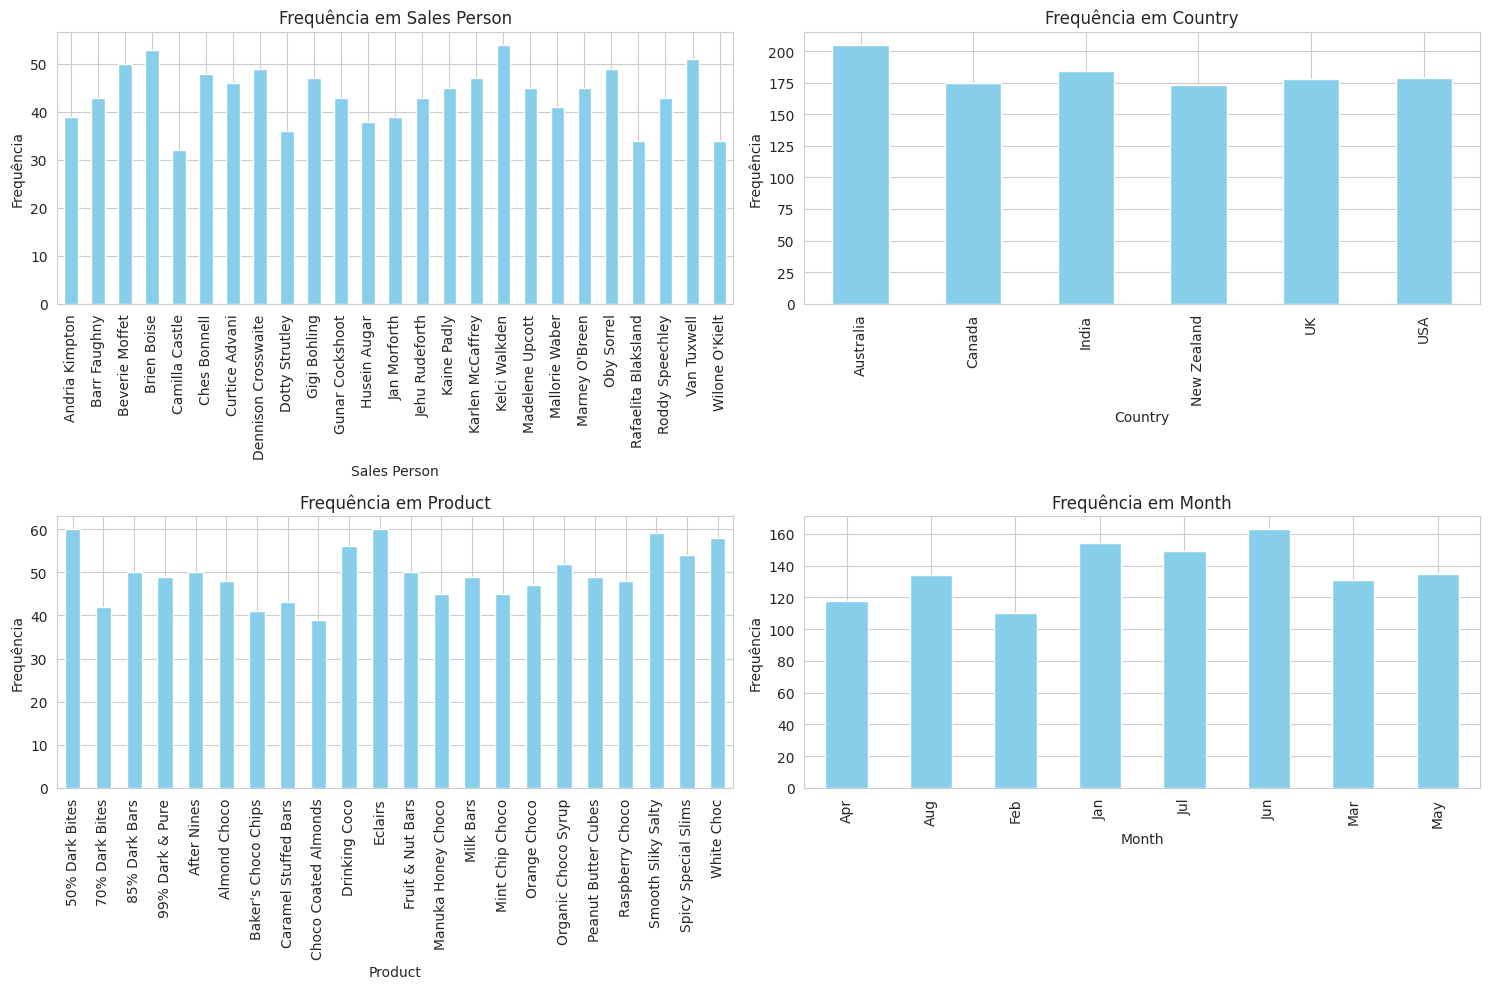

In [ ]:
plot_categorical_frequency_pt(df)

###**4.2 - Análise Multivariada**

####**4.2.1 - Analisando os produtos**

In [ ]:
top_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

In [ ]:
len(top_products)

22

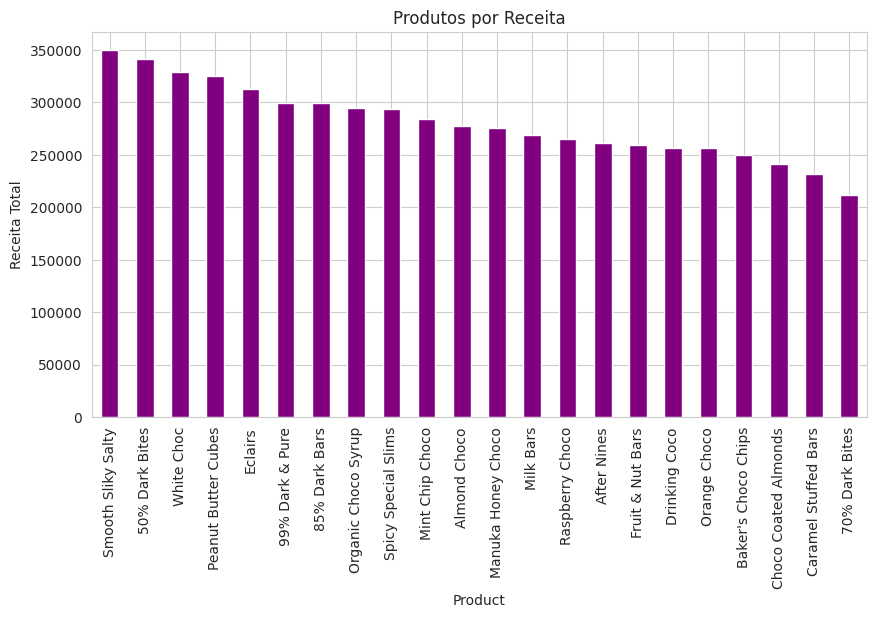

In [ ]:
top_products.head(22).plot(kind='bar', figsize=(10, 5), title="Produtos por Receita", color='purple')
plt.ylabel("Receita Total")
plt.show()

- 1) Foco nos produtos de maior receita

O produto "Smooth Silky Salty" lidera as vendas em receita, seguido de "50% Dark Bites" e "White Choc".

Estratégias como campanhas promocionais e aumento da distribuição podem maximizar a lucratividade desses produtos.

- 2) Expansão dos produtos premium

Produtos como "99% Dark & Pure" e "85% Dark Bars" aparecem no topo, indicando que há demanda por chocolates com alto teor de cacau.

Explorar variações desses produtos ou criar novos sabores pode ser uma boa estratégia.

- 3) Revisão dos produtos com menor receita

O último colocado, "70% Dark Bites", tem uma receita significativamente menor.

Precisamos entender se o problema está na precificação, demanda ou falta de marketing.

- 4) Produtos com alto volume de vendas, mas baixa margem

Se algum dos produtos bem vendidos tem baixo valor agregado, pode ser interessante reajustar preços ou otimizar custos de produção.

- 5) Oportunidade de cross-sell

Combinar produtos mais vendidos com outros complementares em promoções pode incentivar compras maiores.

Exemplo: Se "Smooth Silky Salty" vende bem, podemos oferecer pacotes com "Peanut Butter Cubes".

In [ ]:
top_sellers = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)
top_sellers

,Amount
Sales Person,
Ches Bonnell,320901.0
Oby Sorrel,316645.0
Madelene Upcott,316099.0
Brien Boise,312816.0
Kelci Walkden,311710.0
Van Tuxwell,303149.0
Dennison Crosswaite,291669.0
Beverie Moffet,278922.0
Kaine Padly,266490.0


####**4.2.2 - Analisando os vendedores**

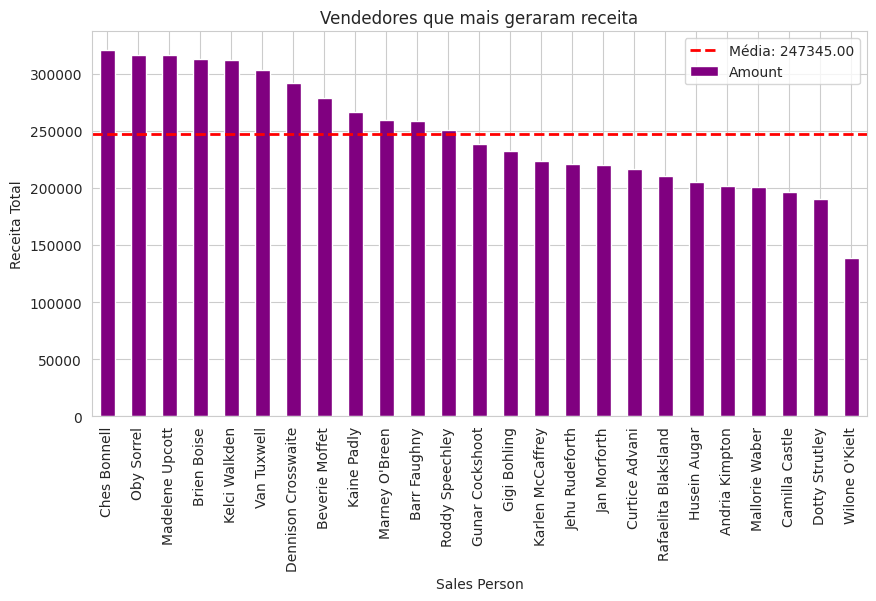

In [ ]:
top_sellers.plot(kind='bar', figsize=(10, 5), title="Vendedores que mais geraram receita", color='purple')
# Adicionando a linha da média
media_receita = top_sellers.mean()
plt.axhline(media_receita, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media_receita:.2f}')

plt.ylabel("Receita Total")
plt.legend()
plt.show()

- Podemos notar que o vendedor que teve a maior frequência de venda não foi o que mais gerou receita, indicando que não devemos olhar apenas pela quantidade de itens vendidos, mas sim quais foram os itens vendidos
- Como estratégia podemos entender quais foram os produtos que o Ches vendeu e replica-los para o Kelci
- Podemos também identificar quais foram os produtos que Wilone vendeu e entender se na região onde ele se encontra a procura pelos produtos mais caros é muito baixa
- Outro ponto é entender os vendedores não estão sobrecarregados
- Caso venhamos a desligar algum funcionario, devemos cruzar as informações com a quantidade de produtos vendidos e a receita gerada
- O vendedor Wilone possui a menor quantidade de receita vendida e a menor quantidade de produtos vendidos, entender se isso é causado pela região que ele está alocado
- Podemos observar que quase metade dos vendedores estão abaixo da média

####**4.2.3 - Análise temporal**

- Normalização: As séries de dados foram normalizadas para um intervalo entre 0 e 1. A fórmula usada é a seguinte:

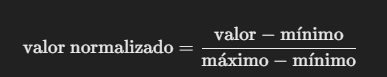

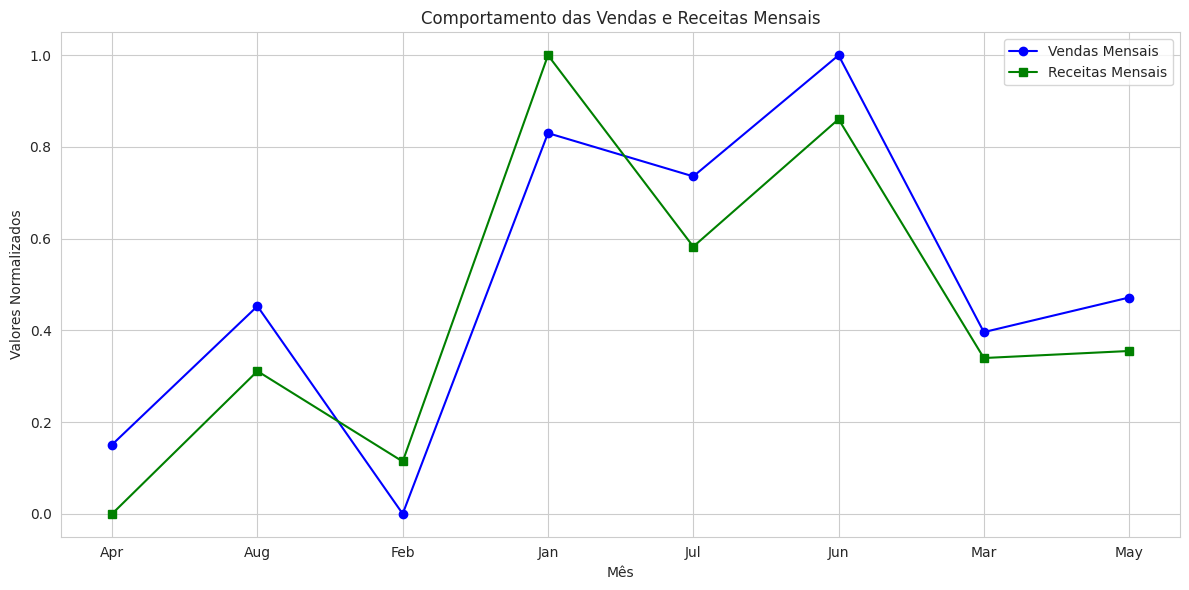

In [ ]:
# Agrupando os dados por mês para obter a contagem de vendas e a soma das receitas
vendas_mensais = df.groupby('Month').size()
receita_mensal = df.groupby('Month')['Amount'].sum()

# Normalizando os dados para visualizar o comportamento sem se preocupar com a escala
vendas_normalizadas = (vendas_mensais - vendas_mensais.min()) / (vendas_mensais.max() - vendas_mensais.min())
receita_normalizada = (receita_mensal - receita_mensal.min()) / (receita_mensal.max() - receita_mensal.min())

# Criando o gráfico
plt.figure(figsize=(12, 6))

# Gráfico de evolução das vendas normalizadas
plt.plot(vendas_normalizadas.index, vendas_normalizadas.values, marker='o', linestyle='-', color='blue', label='Vendas Mensais')

# Gráfico de evolução das receitas normalizadas
plt.plot(receita_normalizada.index, receita_normalizada.values, marker='s', linestyle='-', color='green', label='Receitas Mensais')

# Adicionando título e rótulos
plt.title('Comportamento das Vendas e Receitas Mensais')
plt.xlabel('Mês')
plt.ylabel('Valores Normalizados')
plt.grid(True)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

- Podemos observar que ambos os gráficos seguem a mesma tendência durante o tempo
- Outro ponto que podemos observar é que o mês que mais teve venda não foi necessariamente o mês que mais lucrativo. Podemos observar que Janeiro foi o mês que gerou a maior receita, enquanto Junho foi o mês com o maior número de itens vendidos.
- Cabe estudar mais afundo o que houve nesses meses

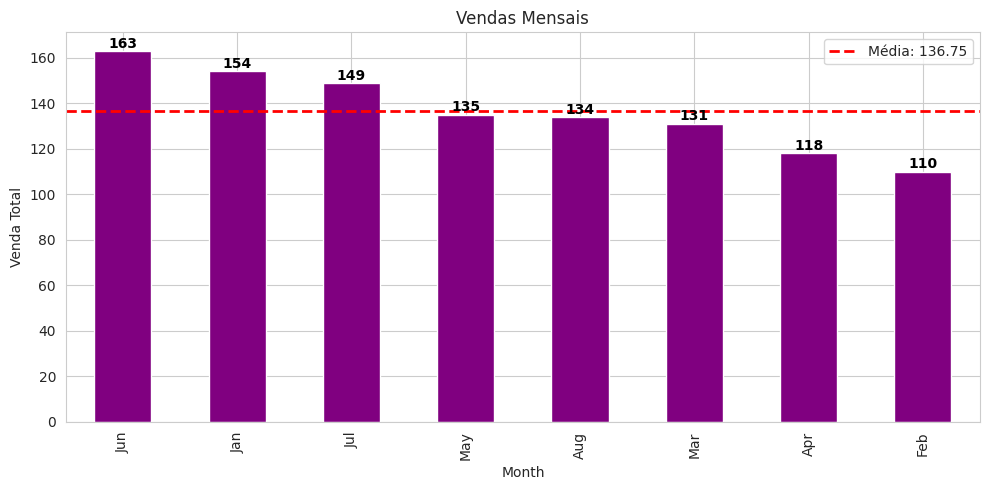

In [ ]:
# Ordenando as vendas mensais do maior para o menor
vendas_mensais_sorted = vendas_mensais.sort_values(ascending=False)

# Criando o gráfico de barras com as vendas ordenadas
ax = vendas_mensais_sorted.plot(kind='bar', figsize=(10, 5), title="Vendas Mensais", color='purple')

# Adicionando a linha da média
media_venda = vendas_mensais.mean()
plt.axhline(media_venda, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media_venda:.2f}')

# Adicionando os valores nas barras
for i, v in enumerate(vendas_mensais_sorted):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', color='black', fontweight='bold')

# Adicionando rótulo e legenda
plt.ylabel("Venda Total")
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

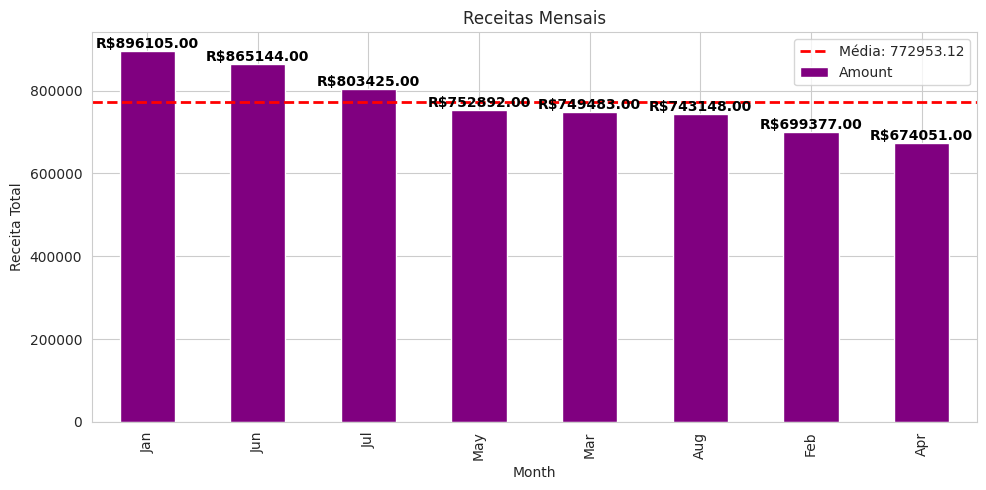

In [ ]:
# Ordenando as receitas mensais do maior para o menor
receita_mensal_sorted = receita_mensal.sort_values(ascending=False)

# Criando o gráfico de barras com as receitas ordenadas
ax = receita_mensal_sorted.plot(kind='bar', figsize=(10, 5), title="Receitas Mensais", color='purple')

# Adicionando a linha da média
media_receita = receita_mensal.mean()
plt.axhline(media_receita, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media_receita:.2f}')

# Adicionando os valores nas barras
for i, v in enumerate(receita_mensal_sorted):
    ax.text(i, v + 0.1, f'R${v:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

# Adicionando rótulo e legenda
plt.ylabel("Receita Total")
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

As visualizações em barra acima corrobora o que analisamos nos gráficos de linha

In [ ]:
# Supondo que a coluna 'Price' exista em seu DataFrame 'df' com o preço unitário de cada produto
contagem_produtos_por_mes = df.groupby(['Month', 'Product']).size()

# Agora, vamos adicionar o preço unitário para cada produto. Assumimos que 'Price' é a coluna do preço.
preco_unitario = df.groupby('Product')['Amount per box'].first()  # Pegando o primeiro preço para cada produto

# Agora, podemos combinar a contagem com o preço unitário
contagem_produtos_por_mes = contagem_produtos_por_mes.reset_index(name='Quantidade')

# Adicionando a coluna de preço unitário ao DataFrame
contagem_produtos_por_mes['Price'] = contagem_produtos_por_mes['Product'].map(preco_unitario)

# Visualizando o DataFrame final
contagem_produtos_por_mes

,Month,Product,Quantidade,Price
0,Apr,50% Dark Bites,8,67.63
1,Apr,70% Dark Bites,6,54.25
2,Apr,85% Dark Bars,7,84.00
3,Apr,99% Dark & Pure,1,77.76
4,Apr,After Nines,7,42.19
5,Apr,Almond Choco,4,51.42
6,Apr,Baker's Choco Chips,5,10.18
7,Apr,Caramel Stuffed Bars,4,184.55
8,Apr,Choco Coated Almonds,6,19.84
9,Apr,Drinking Coco,4,1.08


In [ ]:
contagem_produtos_por_mes_jan = contagem_produtos_por_mes[contagem_produtos_por_mes['Month'].isin(['Jan'])]
contagem_produtos_por_mes_jun = contagem_produtos_por_mes[contagem_produtos_por_mes['Month'].isin(['Jun'])]

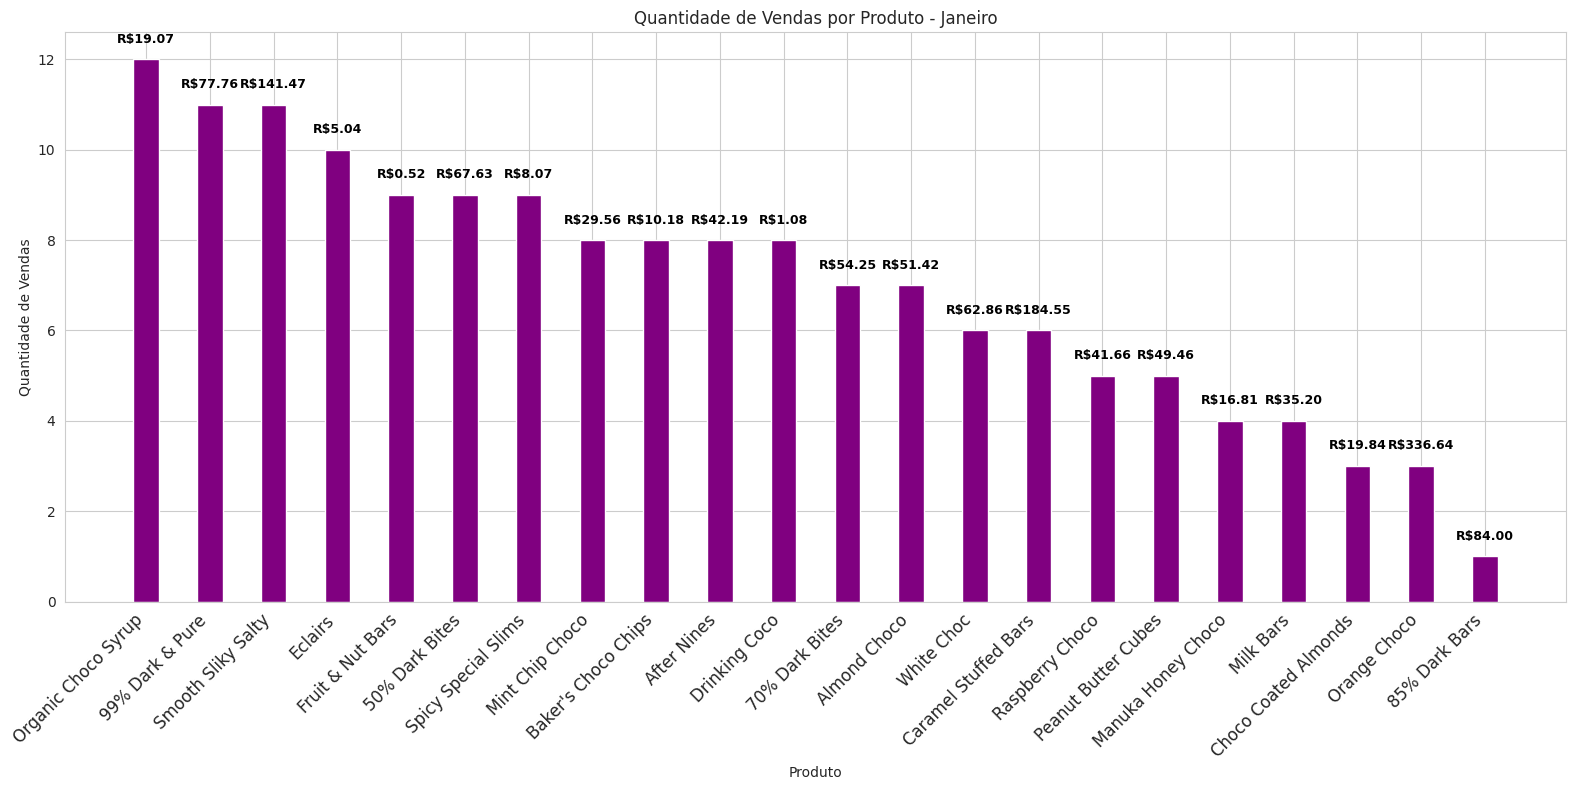

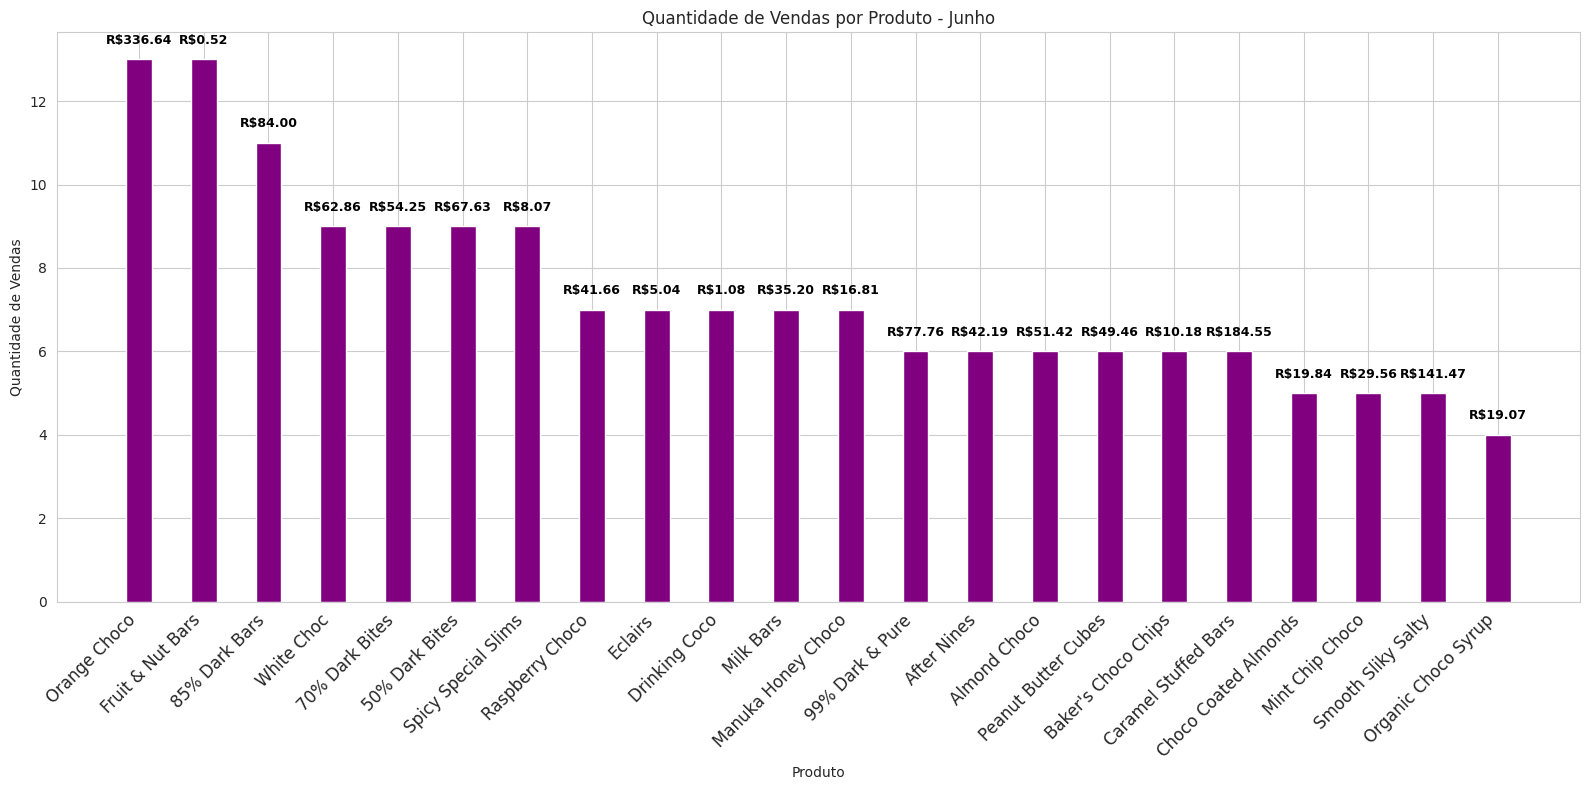

In [ ]:
contagem_produtos_por_mes_jan = contagem_produtos_por_mes_jan.sort_values(by='Quantidade', ascending=False)

# Criando o gráfico de barras para a quantidade de vendas por produto
plt.figure(figsize=(16, 8))  # Tamanho do gráfico maior para mais espaço

# Plotando as barras com mais espaçamento
bars = plt.bar(contagem_produtos_por_mes_jan['Product'],
               contagem_produtos_por_mes_jan['Quantidade'],
               color='purple',
               width=0.4)  # Largura da barra ainda mais reduzida para criar mais espaçamento

# Adicionando título e rótulos
plt.title('Quantidade de Vendas por Produto - Janeiro')
plt.xlabel('Produto')
plt.ylabel('Quantidade de Vendas')

# Adicionando os preços unitários nas barras com fonte menor
for i, p in enumerate(contagem_produtos_por_mes_jan['Price']):
    # Movendo o texto para cima e afastando mais para o lado para evitar sobreposição
    plt.text(i, bars[i].get_height() + 0.3, f'R${p:.2f}',
             ha='center', va='bottom',
             color='black', fontweight='bold', fontsize=9)  # Fonte menor

# Rotacionando os rótulos do eixo X para melhor leitura e evitando sobreposição
plt.xticks(rotation=45, ha='right', fontsize=12)

# Ajustando o layout para garantir que tudo caiba no gráfico
plt.tight_layout()

# Exibindo o gráfico
plt.show()

#-------------------------------------------------------------------------------------------------------------------

contagem_produtos_por_mes_jun = contagem_produtos_por_mes_jun.sort_values(by='Quantidade', ascending=False)

# Criando o gráfico de barras para a quantidade de vendas por produto
plt.figure(figsize=(16, 8))  # Tamanho do gráfico maior para mais espaço

# Plotando as barras com mais espaçamento
bars = plt.bar(contagem_produtos_por_mes_jun['Product'],
               contagem_produtos_por_mes_jun['Quantidade'],
               color='purple',
               width=0.4)  # Largura da barra ainda mais reduzida para criar mais espaçamento

# Adicionando título e rótulos
plt.title('Quantidade de Vendas por Produto - Junho')
plt.xlabel('Produto')
plt.ylabel('Quantidade de Vendas')

# Adicionando os preços unitários nas barras com fonte menor
for i, p in enumerate(contagem_produtos_por_mes_jun['Price']):
    # Movendo o texto para cima e afastando mais para o lado para evitar sobreposição
    plt.text(i, bars[i].get_height() + 0.3, f'R${p:.2f}',
             ha='center', va='bottom',
             color='black', fontweight='bold', fontsize=9)  # Fonte menor

# Rotacionando os rótulos do eixo X para melhor leitura e evitando sobreposição
plt.xticks(rotation=45, ha='right', fontsize=12)

# Ajustando o layout para garantir que tudo caiba no gráfico
plt.tight_layout()

# Exibindo o gráfico
plt.show()

- Aqui podemos notar que o mês que mais gerou receita foi o que vendeu a maior quantidade de caixas "caras", podemos analisar mais a fundo para entender quem fez essa venda e replicar as suas estratégias para os demais vendedores
- Baseado no gráfico de Junho, podemos traçar estratégias para aumentar as vendas de Orange Choco, entender quem são os compradores e os seus perfis.
- Fazer uma análise cruzada para aplicar as estratégias de vendas em quantidade de Janeiro para os produtos vendidos em Junho

In [ ]:
produto_resumo = df.groupby('Product').agg(
    total_boxes_shipped=('Boxes Shipped', 'count'),
    total_amount=('Amount', 'sum')
).reset_index()

# Passo 2: Calcular a relação entre 'Boxes Shipped' e 'Amount'
produto_resumo['amount_por_box'] = produto_resumo['total_amount'] / produto_resumo['total_boxes_shipped']

# Passo 3: Filtrar os produtos com alta quantidade de caixas, mas baixo valor
# Por exemplo, você pode definir um limiar para "alta quantidade de Boxes Shipped"
# e "baixo valor de Amount". Ajuste esses valores conforme necessário.

limiar_boxes = produto_resumo['total_boxes_shipped'].quantile(0.75)  # 75% de Boxes Shipped como limiar
limiar_amount = produto_resumo['total_amount'].quantile(0.25)  # 25% de Amount como limiar

# Filtrando os produtos que atendem a esse critério
produtos_criticos = produto_resumo[(produto_resumo['total_boxes_shipped'] > limiar_boxes) &
                                   (produto_resumo['total_amount'] < limiar_amount)]

# Exibindo os resultados
produtos_criticos[['Product', 'total_boxes_shipped', 'total_amount', 'amount_por_box']]

,Product,total_boxes_shipped,total_amount,amount_por_box
9,Drinking Coco,56,256655.0,4583.125


- Podemos ver que o Drinking Coco é o produto grande quantidade de Shipped Box mas com a menor receita, mostrando que ele contém o menor preço por box
- Analisar se a logistica para a entrega desse produto ainda faz sentido, tendo em vista que a receita que ele gera é baixa pela quantidade vendida
- Avaliar com o time de negócio se para esas quantidade de boxes a receita gerada é condizente

In [ ]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month,Amount per box
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320.0,180,Jan,29.56
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896.0,94,Aug,84.00
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501.0,91,Jul,49.46
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726.0,342,Apr,37.21
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685.0,184,Feb,74.38


####**4.2.4 - Análise por País**

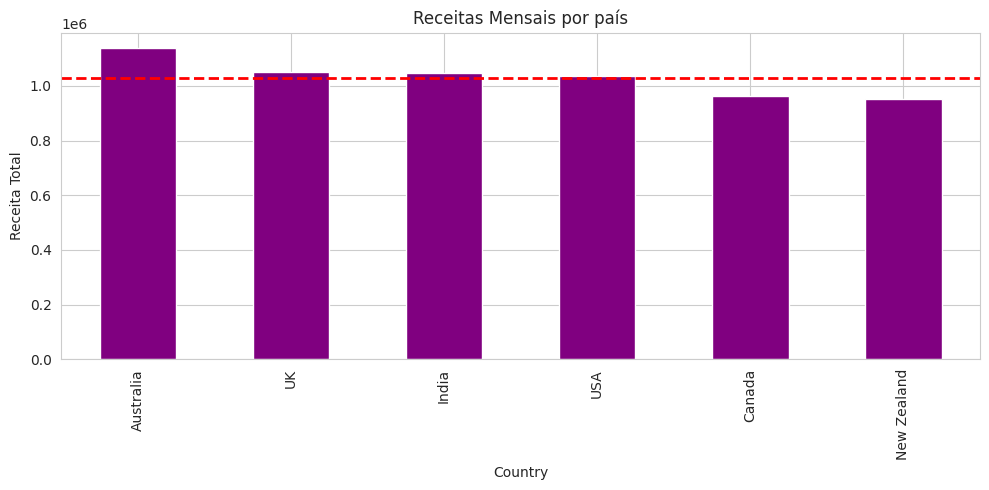

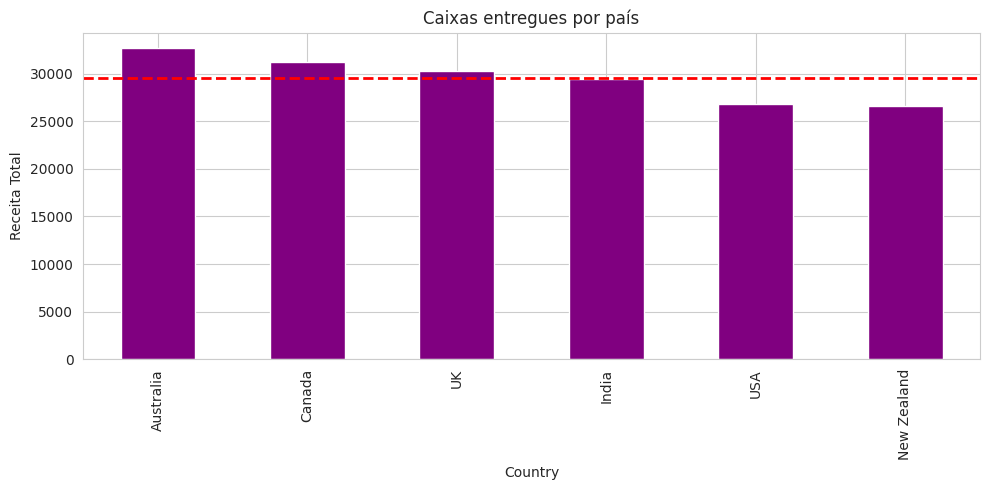

In [ ]:
analise_por_pais = df.groupby('Country')['Amount'].sum()
# Ordenando as receitas mensais do maior para o menor
analise_por_pais = analise_por_pais.sort_values(ascending=False)

# Criando o gráfico de barras com as receitas ordenadas
ax = analise_por_pais.plot(kind='bar', figsize=(10, 5), title="Receitas Mensais por país", color='purple')

# Adicionando a linha da média
media_receita = analise_por_pais.mean()
plt.axhline(media_receita, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media_receita:.2f}')

# Adicionando os valores nas barras
# for i, v in enumerate(receita_mensal_sorted):
#     ax.text(i, v + 0.1, f'R${v:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

# Adicionando rótulo e legenda
plt.ylabel("Receita Total")
# plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()


#-------------------------------------------------------------------------------------------------------------------
analise_por_pais_caixa = df.groupby('Country')['Boxes Shipped'].sum()
# Ordenando as receitas mensais do maior para o menor
analise_por_pais_caixa = analise_por_pais_caixa.sort_values(ascending=False)

# Criando o gráfico de barras com as receitas ordenadas
ax = analise_por_pais_caixa.plot(kind='bar', figsize=(10, 5), title="Caixas entregues por país", color='purple')

# Adicionando a linha da média
media_receita = analise_por_pais_caixa.mean()
plt.axhline(media_receita, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media_receita:.2f}')

# Adicionando os valores nas barras
# for i, v in enumerate(receita_mensal_sorted):
#     ax.text(i, v + 0.1, f'R${v:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

# Adicionando rótulo e legenda
plt.ylabel("Receita Total")
# plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

- Podemos observar que o páis que mais gerou receita foi Australia, onde também foi o país onde mais caixas foram entregues.
- Porém para os outros países podemos observar que a quantidad de caixa entregue não significa maior receita, depende muito do valor por caixa entregue.
- Podemos expandir o mercado na Australia, sendo o país que mais gerou receita e usar estratégias de marketing para aumentar o valor por caixa vendido

####**4.2.5 - Correlações**

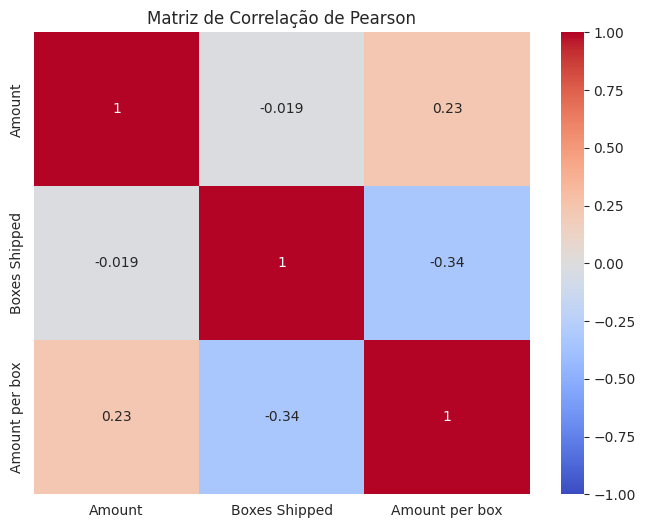

In [ ]:
# Calculando a matriz de correlação
corr_matrix = df.select_dtypes(include=np.number).corr()

# Plotando a matriz de correlação usando um heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação de Pearson')
plt.show()

##**5 - Insights e recomendações**

###Analises Estatisticas Univariadas:

- 1. Aumento da Receita
-- O histograma de "Amount" (Valor total das vendas) mostra uma distribuição assimétrica à direita, indicando que a maioria das vendas ocorre em faixas menores de faturamento, mas há outliers com valores altos.
Ação: Estratégias para incentivar compras maiores, como descontos progressivos ou pacotes promocionais, podem ajudar a aumentar o ticket médio.
-- O gráfico de "Amount per box" mostra que a maioria das caixas vendidas tem um valor unitário baixo, o que sugere que os preços podem estar comprimidos.
Ação: Explorar a possibilidade de lançar produtos premium ou pacotes de edição limitada para aumentar o valor médio por caixa.

- 2. Redução de Custos
-- O histograma de "Boxes Shipped" mostra que a maioria dos pedidos envolve um número relativamente baixo de caixas, mas há um longo cauda de pedidos grandes.
Ação: Avaliar os custos logísticos e ver se pedidos pequenos estão gerando ineficiências no transporte. Programas de "Pedido Mínimo para Frete Grátis" podem ajudar a reduzir a frequência de envios pequenos e aumentar a eficiência operacional.
-- A variação de "Amount per box" sugere que pode haver oportunidades de otimização na precificação ou embalagem.
Ação: Verificar se o custo de embalagem e distribuição está alinhado com a margem de lucro dos diferentes produtos.

- 3. Melhoria na Qualidade de Vida
-- Caso a empresa tenha clientes corporativos ou revendedores, os pedidos muito pequenos podem indicar dificuldades na gestão de estoque por parte dos clientes.
Ação: Oferecer soluções como assinaturas de chocolates para garantir um fluxo previsível de pedidos e reduzir a necessidade de pequenos reabastecimentos.
-- Se os produtos forem voltados para consumidores finais, o preço baixo por caixa pode indicar que clientes compram chocolates esporadicamente e em pequenas quantidades.
Ação: Criar programas de fidelidade para incentivar compras frequentes e aumentar o engajamento do consumidor.

- 1. Oportunidades para Aumento de Receita
-- O ticket médio por pedido é 5.652,31, mas há uma alta variação (desvio padrão: 4.102,44) e pedidos chegando a 22.050,00.
-- Ação: Criar estratégias para aumentar o ticket médio, como pacotes de produtos premium, descontos progressivos ou brindes para compras acima de um certo valor.
-- A mediana do "Amount per box" é 36,15, mas a média está em 105,72, o que sugere que poucos pedidos de alto valor distorcem a média. Além disso, o percentil 75% é 79,16, mostrando que 75% dos pedidos têm um valor por caixa inferior a esse.
-- Ação: Trabalhar na precificação, possivelmente segmentando produtos para diferentes públicos e destacando itens de maior valor agregado.

- 2. Redução de Custos
-- A mediana de caixas enviadas por pedido é 135, mas há pedidos pequenos (mínimo de 1 caixa) e muito grandes (máximo de 709 caixas).
-- Ação: Avaliar se pedidos pequenos estão gerando custos logísticos desproporcionais. Criar incentivos para compras em maior volume pode ajudar a reduzir o número de pedidos pequenos e otimizar a logística.
-- O Amount per box tem uma variação extremamente alta (desvio padrão de 278,66, com pedidos indo de 0,01 até 4.291,00).
-- Ação: Pode ser interessante analisar se certos clientes ou canais de venda têm um valor muito abaixo da média, indicando necessidade de ajustes na política de precificação.

- 3. Melhorias na Qualidade de Vida
-- Se houver um número significativo de pedidos pequenos, pode indicar que os clientes têm dificuldades na gestão de estoque ou fluxo de caixa.
-- Ação: Criar um programa de assinatura ou recompra automática pode facilitar a vida dos clientes e garantir um fluxo de pedidos mais previsível.
-- A grande dispersão no Amount per box sugere que pode haver diferenças significativas nos tamanhos das embalagens ou produtos vendidos.
-- Ação: Analisar se os produtos mais baratos são acessíveis para clientes de baixa renda e se há formas de melhorar a acessibilidade a chocolates premium.

###Análise multidimensional:
- **1 Foco nos produtos de maior receita**

O produto "Smooth Silky Salty" lidera as vendas em receita, seguido de "50% Dark Bites" e "White Choc".

Estratégias como campanhas promocionais e aumento da distribuição podem maximizar a lucratividade desses produtos.

- **2 Expansão dos produtos premium**

Produtos como "99% Dark & Pure" e "85% Dark Bars" aparecem no topo, indicando que há demanda por chocolates com alto teor de cacau.

Explorar variações desses produtos ou criar novos sabores pode ser uma boa estratégia.

- **3 Revisão dos produtos com menor receita**

O último colocado, "70% Dark Bites", tem uma receita significativamente menor.

Precisamos entender se o problema está na precificação, demanda ou falta de marketing.

- **4 Produtos com alto volume de vendas, mas baixa margem**

Se algum dos produtos bem vendidos tem baixo valor agregado, pode ser interessante reajustar preços ou otimizar custos de produção.

- **5 Oportunidade de cross-sell**

Combinar produtos mais vendidos com outros complementares em promoções pode incentivar compras maiores.

Exemplo: Se "Smooth Silky Salty" vende bem, podemos oferecer pacotes com "Peanut Butter Cubes".

- Podemos notar que o vendedor que teve a maior frequência de venda não foi o que mais gerou receita, indicando que não devemos olhar apenas pela quantidade de itens vendidos, mas sim quais foram os itens vendidos
- Como estratégia podemos entender quais foram os produtos que o Ches vendeu e replica-los para o Kelci
- Podemos também identificar quais foram os produtos que Wilone vendeu e entender se na região onde ele se encontra a procura pelos produtos mais caros é muito baixa
- Outro ponto é entender os vendedores não estão sobrecarregados
- Caso venhamos a desligar algum funcionario, devemos cruzar as informações com a quantidade de produtos vendidos e a receita gerada
- O vendedor Wilone possui a menor quantidade de receita vendida e a menor quantidade de produtos vendidos, entender se isso é causado pela região que ele está alocado
- Podemos observar que quase metade dos vendedores estão abaixo da média
- Podemos observar que ambos os gráficos seguem a mesma tendência durante o tempo
- Outro ponto que podemos observar é que o mês que mais teve venda não foi necessariamente o mês que mais lucrativo. Podemos observar que Janeiro foi o mês que gerou a maior receita, enquanto Junho foi o mês com o maior número de itens vendidos.
- Cabe estudar mais afundo o que houve nesses meses